# Homework 3 - Old Faithful Geyser dataset

In [ ]:
#importing all the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the csv file and storing it in the data frame
df = pd.read_csv('faithful.csv')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


##  Scatter plot - Eruption time versus Waiting time

## Question 1A 

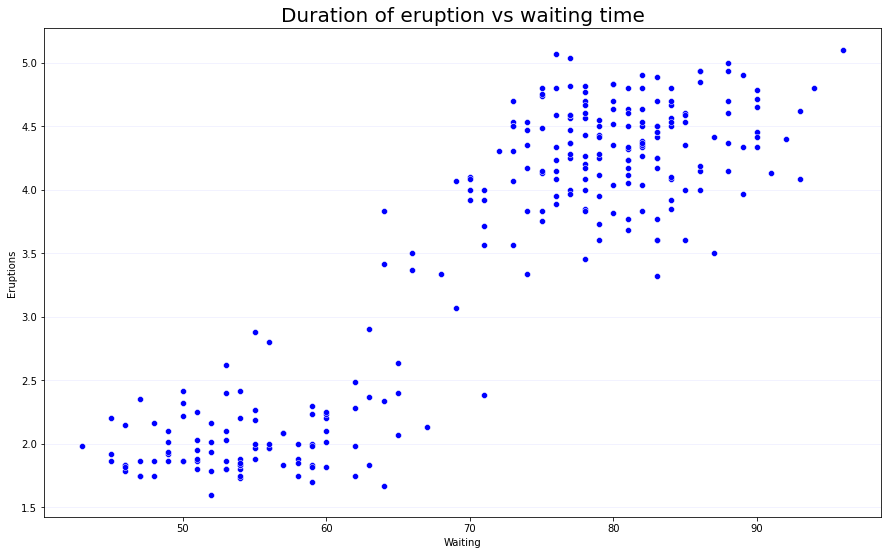

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.scatterplot(data=df, x='waiting', y='eruptions', color='blue')
ax.grid(axis='y', color='blue', linewidth=0.5, alpha=0.1)
ax.set(xlabel='Waiting')
ax.set(ylabel='Eruptions')

plt.title('Duration of eruption vs waiting time', fontsize = 20, c='black')
plt.show()

## Question 1B - How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters

## Question 1C - Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset

# Problem 2

# 2A. Implementing K-means algorithm from Scratch

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

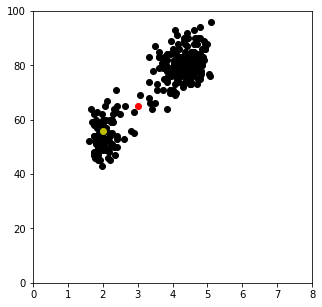

KeyError: "None of [Index(['distance_from_1', 'distance_from_2'], dtype='object')] are in the [columns]"

In [18]:
# np.random.seed(0)
k = 2
# centroids[i] = [x, y]
centroids = {
i+1: [np.random.randint(0, 8), np.random.randint(0, 100)]
for i in range(k)
}
centroids
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['eruptions'], df['waiting'], color='k')
colmap = {1: 'r', 2: 'y'}
colmap2 = {1: 'b', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 100)
plt.show()

#Centriods
def assignment(df, centroids):
    temp = centroids
    for i in centroids.keys():
# sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['eruptions'] - centroids[i][0]) ** 2
                + (df['waiting'] - centroids[i][1]) ** 2
    )
)
centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
df['color'] = df['closest'].map(lambda x: colmap[x])
for i in centroids.keys():
    centroids[i]=[df.loc[df['closest']==i,'eruptions'].mean(),df.loc[df['closest']==i,'waiting'].mean()]
if temp[1]!=centroids[1]:
    if temp[2]!=centroids[2]:
        df,centroids=assignment(df, centroids)
return df,centroids
df,centroids = assignment(df, centroids)
print(df.head())
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5, edgecolor='k')
ax=plt.axes()
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap2[i])
plt.xlim(0, 8)
plt.ylim(0, 100)
ax.autoscale()
plt.show()

## 2B.  A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot

#The plot is in word document

## 2C. A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is

In [41]:
import pandas as pd
import random
import re
%matplotlib inline
import numpy as np
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy.random import randn

In [54]:
mean1=[0,0]
cov=[[1,0],[0,1]]
mean2=[3,0]
mean3=[0,3]
wt=[0.2, 0.5, 0.3]

In [55]:
x1 = np.random.multivariate_normal(mean1, cov, (100))
x2 = np.random.multivariate_normal(mean2, cov, (250))
x3 = np.random.multivariate_normal(mean3, cov, (150))
x=np.vstack((x1,x2,x3))

In [57]:
x.shape

def pick_mu(k):
    x_copy=x
    np.random.shuffle(x_copy)
    mu=x_copy[:k]
    return mu

def kmeans(k):
    c=np.zeros(500).astype(int)
    c=c.astype(int)
    L=[]
    mu=pick_mu(k)
    
    for t in range(20):
        for i in range(x.shape[0]):
            dist=[]
            for k1 in range(k):
                dist.append(np.sqrt(np.sum((x[i]-mu[k1])**2)))
            c[i]=np.argmin(dist)+1
        
    for k1 in range(k):
        nk=0
        for i in range(x.shape[0]):
            if c[i]==k1+1:
                nk=nk+1
        val=np.zeros((1,2))
        for i in range(x.shape[0]):
            if c[i]==k1+1:
                val=np.add(val,x[i])
                
        mu[k1]=val/nk
    
    sum1=0
    for i in range(x.shape[0]):
        for k1 in range(k):
            if c[i]==k1+1:
                sum1=sum1+(np.sum((x[i]-mu[k1])**2))
    L.append(sum1)

    return L,mu,c

In [ ]:
x_axis2 = np.arange(1, 21)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
l2,mu2,c2=kmeans(2)
plt.plot(x_axis2,l2,label="k=2")
l3,mu3,c3=kmeans(3)
plt.plot(x_axis2,l3,label="k=3")
l4,mu4,c4=kmeans(4)
plt.plot(x_axis2,l4,label="k=4")
l5,mu5,c5=kmeans(5)
plt.plot(x_axis2,l5,label="k=5")
plt.xticks(np.arange(min(x_axis2), max(x_axis2)+1, 1.0))
plt.legend(loc='upper right')
plt.title("Objective Training Function L per iteration ")
plt.xlabel("No of iterations ")
plt.ylabel("Objective Training Function")
plt.show()

## 2D. Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?